In [87]:
import json
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [22]:
# Import the JSON file with the results log and open it as dataframe
with open("Results-Language-Comparison.json") as f:
    content = json.load(f)

jsonlikecontent = dict()

for key in content[0].keys():
    jsonlikecontent[key] = [i[key] for i in content]

results_df = pd.DataFrame(data = jsonlikecontent)

results_df.head()

,Run,microF1,macroF1,y_true,y_pred,run,model
0,SloBERTa_1st_run,0.619289,0.530990,"[News/Reporting, Opinionated News, Invitation,...","[News/Reporting, News/Reporting, Invitation, C...",1,SloBERTa
1,SloBERTa_2nd_run,0.624365,0.591542,"[News/Reporting, Opinionated News, Invitation,...","[News/Reporting, Opinionated News, Invitation,...",2,SloBERTa
2,SloBERTa_3rd_run,0.593909,0.572457,"[News/Reporting, Opinionated News, Invitation,...","[List of Summaries/Excerpts, Opinionated News,...",3,SloBERTa
3,SloBERTa_4th_run,0.598985,0.522093,"[News/Reporting, Opinionated News, Invitation,...","[Opinionated News, Opinionated News, Invitatio...",4,SloBERTa
4,SloBERTa_5th_run,0.609137,0.539267,"[News/Reporting, Opinionated News, Invitation,...","[Opinionated News, Opinionated News, Invitatio...",5,SloBERTa


In [23]:
results_df.columns

Index(['Run', 'microF1', 'macroF1', 'y_true', 'y_pred', 'run', 'model'], dtype='object')

In [60]:
def calculate_mean_std(model_name):
    '''
    This function takes the model_name from the "model column" in results_df and prints out the mean and std overall all of the runs of the model.

    Args: model_name (str): the name of the model as stated in the results_df.model column.

    Returns: A dictionary with the model name, F1 macro and micro means and stds.
    '''
    group_per_model_results = results_df.groupby("model")
    model_results = group_per_model_results.get_group(model_name)

    # Calculate the mean and std of micro and macro F1 scores
    micro_f1 = model_results.microF1.values
    macro_f1 = model_results.macroF1.values

    fmi_mean = micro_f1.mean()
    fmi_std = micro_f1.std()

    fma_mean = macro_f1.mean()
    fma_std = macro_f1.std()

    print(f"{model_name} & {fmi_mean:0.3} $\pm$ {fmi_std:0.1} & {fma_mean:0.3} $\pm$ {fma_std:0.1}\\")
    
    results = {"Model":model_name, "Micro F1": f"{fmi_mean:0.3}", "Micro STD": f"{fmi_std:0.2}","Macro F1": f"{fma_mean:0.3}", "Macro STD": f"{fma_std:0.2}"}
    return results 

In [61]:
print("""
Model & Micro F1 & Macro F1\\""")
calculate_mean_std("SloBERTa")


Model & Micro F1 & Macro F1\
SloBERTa & 0.609 $\pm$ 0.01 & 0.551 $\pm$ 0.03\


{'Model': 'SloBERTa',
 'Micro F1': '0.609',
 'Micro STD': '0.012',
 'Macro F1': '0.551',
 'Macro STD': '0.026'}

In [63]:
print("""
Model & Micro F1 & Macro F1\\""")

mean_results_list = []

for i in results_df.model.unique().tolist():
    mean_results_list.append(calculate_mean_std(i))


Model & Micro F1 & Macro F1\
SloBERTa & 0.609 $\pm$ 0.01 & 0.551 $\pm$ 0.03\
CroSloEngualBERT & 0.515 $\pm$ 0.02 & 0.411 $\pm$ 0.04\
XMLRobertaBase & 0.554 $\pm$ 0.02 & 0.552 $\pm$ 0.02\
BERTić & 0.486 $\pm$ 0.008 & 0.455 $\pm$ 0.04\
BERT & 0.297 $\pm$ 0.02 & 0.24 $\pm$ 0.04\


In [64]:
mean_results_list

[{'Model': 'SloBERTa',
  'Micro F1': '0.609',
  'Micro STD': '0.012',
  'Macro F1': '0.551',
  'Macro STD': '0.026'},
 {'Model': 'CroSloEngualBERT',
  'Micro F1': '0.515',
  'Micro STD': '0.018',
  'Macro F1': '0.411',
  'Macro STD': '0.038'},
 {'Model': 'XMLRobertaBase',
  'Micro F1': '0.554',
  'Micro STD': '0.016',
  'Macro F1': '0.552',
  'Macro STD': '0.018'},
 {'Model': 'BERTić',
  'Micro F1': '0.486',
  'Micro STD': '0.0081',
  'Macro F1': '0.455',
  'Macro STD': '0.04'},
 {'Model': 'BERT',
  'Micro F1': '0.297',
  'Micro STD': '0.018',
  'Macro F1': '0.24',
  'Macro STD': '0.042'}]

Calculating the statistical significance:

Comparing statistical significance for SloBERTa and XMLRoBERTa Base:

In [67]:
c1 = results_df.model == "SloBERTa"
c2 = results_df.model == "XMLRobertaBase"

In [73]:
#Candidate:
higher = results_df.loc[c1, "macroF1"][0:5]
#Alternative
lower = results_df.loc[c2, "macroF1"][0:5]

print(f"MannWhithey p value: {stats.mannwhitneyu(higher,lower, alternative='greater')[1]:0.3}", "\t\t(alternative hypothesis: first is greater than the second)")

print(f"Student p value: {stats.ttest_ind(higher,lower)[1]:0.3}", "\t\t(null hypothesis: samples have identical average, equal variance is assumed but not necessary)")

import numpy as np
print(f"Higher average: {np.mean(higher):0.4}, lower average: {np.mean(lower):0.4}")

MannWhithey p value: 0.5 		(alternative hypothesis: first is greater than the second)
Student p value: 0.971 		(null hypothesis: samples have identical average, equal variance is assumed but not necessary)
Higher average: 0.5513, lower average: 0.5519


Plotting confusion matrices over all 5 examples

In [109]:
LABELS = ['Information/Explanation','Research Article','Instruction','Recipe', 'Legal/Regulation','Call','Announcement','News/Reporting','Opinionated News','Opinion/Argumentation','Review','Promotion','Promotion of a Product','Promotion of Services','Invitation','Forum','Interview','Correspondence','Prose','List of Summaries/Excerpts','Other']

len(LABELS)

21

In [113]:
# Get the y_true and y_pred labels for all 5 runs:

def cm_over_5_runs(model_name):
    y_pred_all = []
    y_true_all = []


    for element in content:
        if element["model"] == model_name:
            for i in element["y_true"]:
                y_true_all.append(i)
            for i2 in element["y_pred"]:
                y_pred_all.append(i2)

    print(f"Number of all true labels: {len(y_true_all)}, Number of all predicted labels: {len(y_pred_all)}")

    cm = confusion_matrix(y_true_all, y_pred_all, labels=LABELS)
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, cmap="Oranges")
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
    classNames = LABELS
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=90)
    plt.yticks(tick_marks, classNames)

    fig1 = plt.gcf()
    plt.title(f"Confusion Matrix for {model_name} over 5 Runs")
    image_title = f"plots\Confusion_matrix-over-5-runs-{model_name}.png"
    plt.tight_layout()
    plt.show()
    plt.draw()
    fig1.savefig(image_title, dpi=200)

In [103]:
for i in content:
    print(i["model"])

SloBERTa
SloBERTa
SloBERTa
SloBERTa
SloBERTa
CroSloEngualBERT
CroSloEngualBERT
CroSloEngualBERT
CroSloEngualBERT
CroSloEngualBERT
XMLRobertaBase
XMLRobertaBase
XMLRobertaBase
XMLRobertaBase
XMLRobertaBase
BERTić
BERTić
BERTić
BERTić
BERTić
BERT
BERT
BERT
BERT
BERT


Number of all true labels: 985, Number of all predicted labels: 985


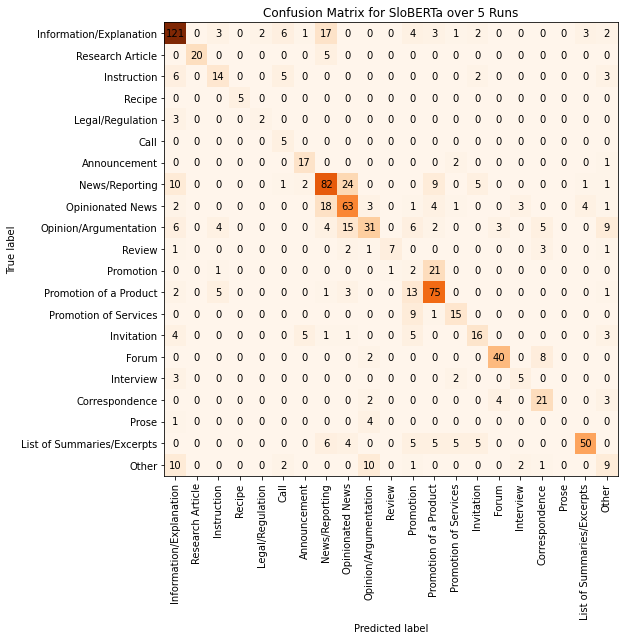

<Figure size 432x288 with 0 Axes>

In [116]:
    cm_over_5_runs("SloBERTa")